# Wine Quality Classification Model

## Data Exploration and Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [ ]:
red = pd.read_csv('/content/winequality-red.csv', sep = ';')
white = pd.read_csv('/content/winequality-white.csv', sep = ';')

In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Proportion of duplicate rows without counting the first occurrence and total rows
print(f'Red: {(red.duplicated(keep = "first").sum()) / red.shape[0]}')
print(f'White: {(white.duplicated(keep = "first").sum()) / white.shape[0]}')

Red: 0.150093808630394
White: 0.19130257247856267


In [ ]:
red.drop_duplicates(keep='first', inplace = True)
white.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Outliers are present in features: free sulfur dioxide and total sulfur dioxide

In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### Outliers are present in features: free sulfur dioxide and total sulfur dioxide

In [ ]:
red.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
white.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#### Split data

In [ ]:
X_red = red.drop(columns = 'quality')
y_red = red['quality']
X_white = white.drop(columns = 'quality')
y_white = white['quality']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size = 0.30, random_state = 42, stratify = y_red)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size = 0.30, random_state = 42, stratify = y_white)

### Addressing Outliers with Winsorizing approach

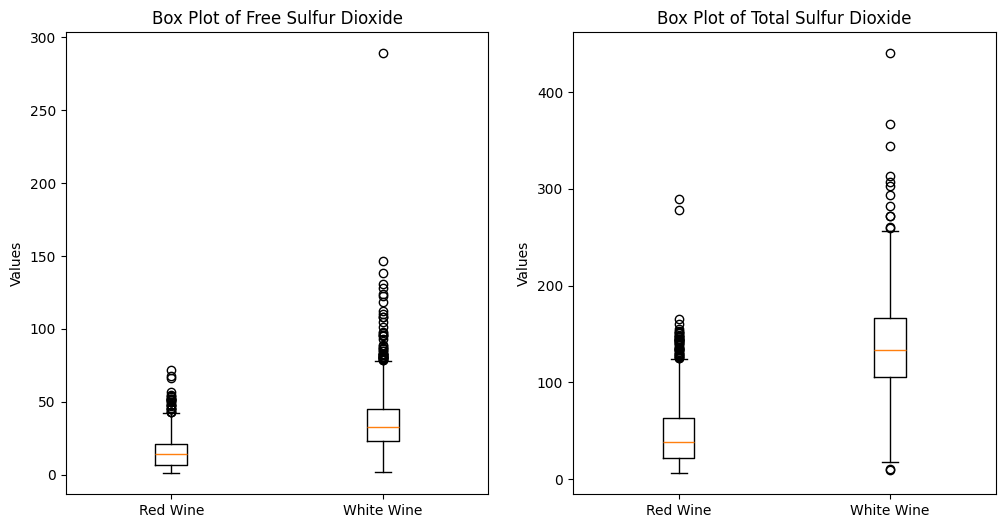

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([X_red['free sulfur dioxide'], X_white['free sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Free Sulfur Dioxide')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.boxplot([X_red['total sulfur dioxide'], X_white['total sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Total Sulfur Dioxide')
plt.ylabel('Values')
plt.show()

In [ ]:
# Function for capping outliers which is not in the range of 1st to 99th percentile
def cap_outliers_iqr(df, column):
    lower_cap = df[column].quantile(0.01)
    upper_cap = df[column].quantile(0.99)

    # Cap the outliers
    df[column] = np.where(df[column] < lower_cap, lower_cap,
                          np.where(df[column] > upper_cap, upper_cap, df[column]))

    return df

column_outlier = ['free sulfur dioxide', 'total sulfur dioxide']

X_train_red_capped = X_train_red.copy()
X_train_white_capped = X_train_white.copy()

for column in column_outlier:
    X_train_red_capped = cap_outliers_iqr(X_train_red_capped, column)
    X_train_white_capped = cap_outliers_iqr(X_train_white_capped, column)

### Results after removing outliers

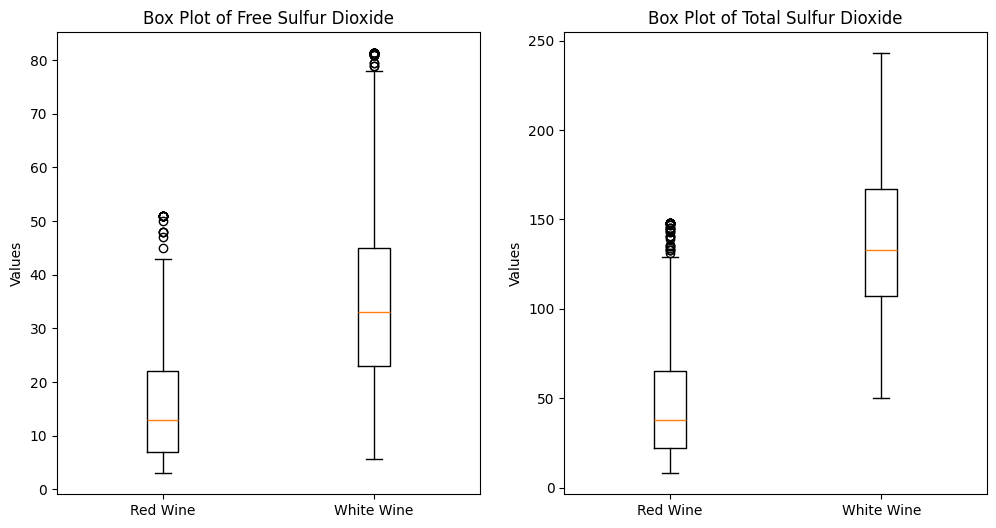

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([X_train_red_capped['free sulfur dioxide'], X_train_white_capped['free sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Free Sulfur Dioxide')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.boxplot([X_train_red_capped['total sulfur dioxide'], X_train_white_capped['total sulfur dioxide']], tick_labels=['Red Wine', 'White Wine'])
plt.title('Box Plot of Total Sulfur Dioxide')
plt.ylabel('Values')
plt.show()

## Data Visualization

Text(0.5, 0, 'White Wine Quality')

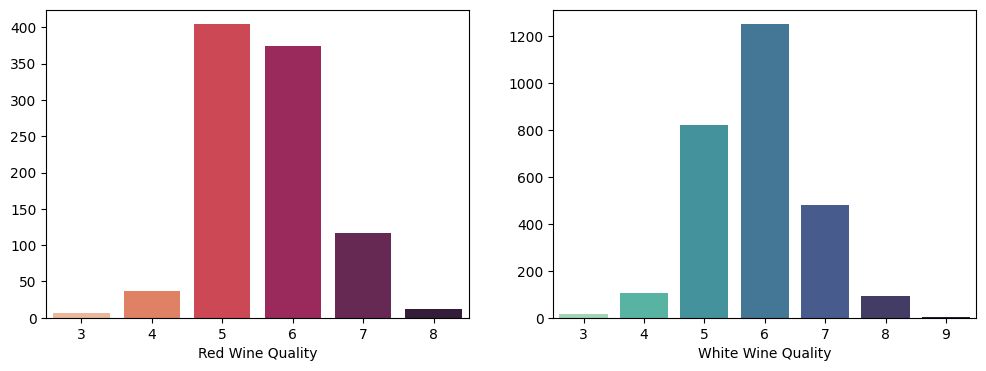

In [ ]:
plt.figure(figsize = (12, 4))

count_quality_red = y_train_red.value_counts().sort_index() # this is used for x and y in sns.barplot
count_quality_white = y_train_white.value_counts().sort_index()
palette_red = sns.color_palette("rocket", len(count_quality_red))[::-1] # reverse the color palette so that higher quality is associated with darker color
palette_white = sns.color_palette("mako", len(count_quality_white))[::-1]

plt.subplot(1, 2, 1)
sns.barplot(x = count_quality_red.index, y = count_quality_red.values, hue = count_quality_red.index, palette=palette_red, legend=False)
plt.xlabel('Red Wine Quality')

plt.subplot(1, 2, 2)
sns.barplot(x = count_quality_white.index.to_list(), y = count_quality_white.values, hue = count_quality_white.index, palette=palette_white, legend=False)
plt.xlabel('White Wine Quality')

#### Hence, this is an imbalanced dataset

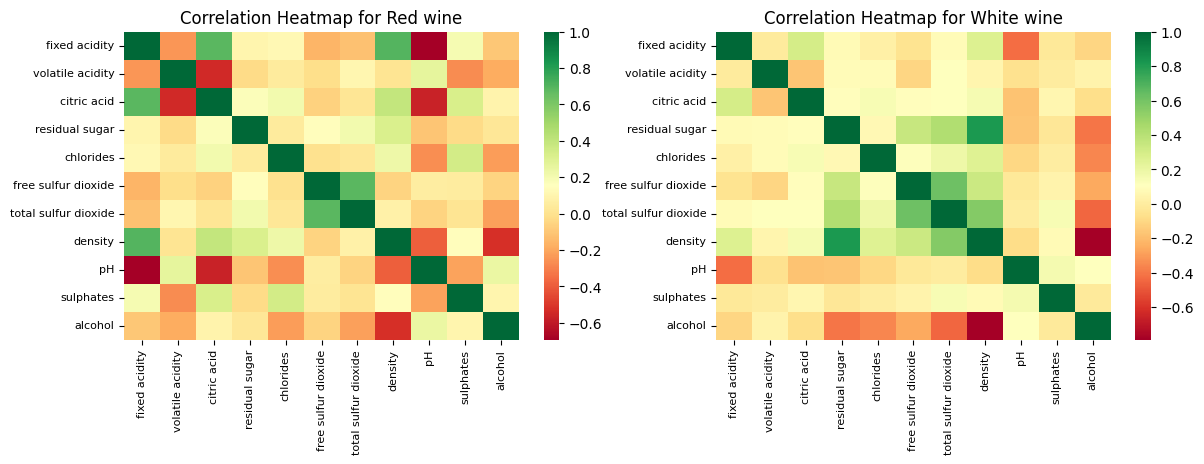

In [ ]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 2, 1)
sns.heatmap(X_train_red_capped.corr(), cmap = 'RdYlGn')
plt.title('Correlation Heatmap for Red wine')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.subplot(1, 2, 2)
sns.heatmap(X_train_white_capped.corr(), cmap = 'RdYlGn')
plt.title('Correlation Heatmap for White wine')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

To prevent multicollinearity, I avoid selecting features that are linearly dependent (high correlation)

## Deep Learning Classifer

#### Load Data

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

#### Prepare TensorDataset

In [ ]:
features = torch.tensor(X_train_white_capped.to_numpy()).float()
target = torch.tensor(y_train_white.to_numpy()).float()

dataset = TensorDataset(features, target)
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
model = nn.Sequential(
    nn.Linear(11, 10),
    nn.ReLU(),
    nn.Dropout(0.6),
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Dropout(0.6),
    nn.Linear(20, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=5e-3)

Train and Validate Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

num_epochs = 56
train_loss = []
val_loss = []

for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0

    for data in train_loader:
        # Set the gradients to zero
        optimizer.zero_grad()
        feature, target = data
        pred = model(feature)
        loss = criterion(pred, target.long())
        loss.backward()
        optimizer.step()

        training_loss += loss.item()  # Accumulate batch losses

    # Compute average training loss per epoch
    epoch_train_loss = training_loss / len(train_loader)
    train_loss.append(epoch_train_loss)

    # Validation Phase
    model.eval()  # Set model to evaluation mode
    validation_loss = 0.0  # Reset before validation loop

    with torch.no_grad():
        for data in val_loader:
            feature, target = data
            pred = model(feature)
            loss = criterion(pred, target.long())

            validation_loss += loss.item()  # Accumulate batch losses

    # Compute average validation loss per epoch
    epoch_val_loss = validation_loss / len(val_loader)
    val_loss.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

model.train()

Epoch 1/56 - Train Loss: 2.4137, Val Loss: 1.6372
Epoch 2/56 - Train Loss: 1.6278, Val Loss: 1.4636
Epoch 3/56 - Train Loss: 1.5287, Val Loss: 1.4035
Epoch 4/56 - Train Loss: 1.4612, Val Loss: 1.3637
Epoch 5/56 - Train Loss: 1.4347, Val Loss: 1.3442
Epoch 6/56 - Train Loss: 1.4226, Val Loss: 1.3339
Epoch 7/56 - Train Loss: 1.4050, Val Loss: 1.3244
Epoch 8/56 - Train Loss: 1.3904, Val Loss: 1.3172
Epoch 9/56 - Train Loss: 1.3926, Val Loss: 1.3138
Epoch 10/56 - Train Loss: 1.3756, Val Loss: 1.3105
Epoch 11/56 - Train Loss: 1.3726, Val Loss: 1.3074
Epoch 12/56 - Train Loss: 1.3753, Val Loss: 1.3044
Epoch 13/56 - Train Loss: 1.3617, Val Loss: 1.3036
Epoch 14/56 - Train Loss: 1.3596, Val Loss: 1.3008
Epoch 15/56 - Train Loss: 1.3590, Val Loss: 1.2995
Epoch 16/56 - Train Loss: 1.3520, Val Loss: 1.2985
Epoch 17/56 - Train Loss: 1.3471, Val Loss: 1.2981
Epoch 18/56 - Train Loss: 1.3475, Val Loss: 1.2952
Epoch 19/56 - Train Loss: 1.3491, Val Loss: 1.2951
Epoch 20/56 - Train Loss: 1.3397, Val Lo

Sequential(
  (0): Linear(in_features=11, out_features=10, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.6, inplace=False)
  (3): Linear(in_features=10, out_features=20, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.6, inplace=False)
  (6): Linear(in_features=20, out_features=10, bias=True)
)

#### Evaluate model in test dataset

In [ ]:
features = torch.tensor(X_test_white.to_numpy()).float()
target = torch.tensor(y_test_white.to_numpy()).float()

test_dataset = TensorDataset(features, target)
test_loader = DataLoader(test_dataset, batch_size = 50, shuffle = True)

In [ ]:
model.eval()
testing_loss = 0.0
test_loss = []
correct = 0
total = 0

for epoch in range(num_epochs):
    testing_loss = 0.0

    with torch.no_grad():
        for data in test_loader:
          feature, target = data
          pred = model(feature)

          loss = criterion(pred, target.long())
          testing_loss += loss.item()

          # Compute accuracy
          _, predicted = torch.max(pred, 1)  # Get class with highest probability
          correct += (predicted == target).sum().item()
          total += target.size(0)

    testing_loss /= len(test_loader)
    test_loss.append(testing_loss)

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 45.16%


In [ ]:
mean_train_loss = sum(train_loss) / len(train_loss)
mean_val_loss = sum(val_loss) / len(val_loss)
mean_test_loss = sum(test_loss) / len(test_loss)

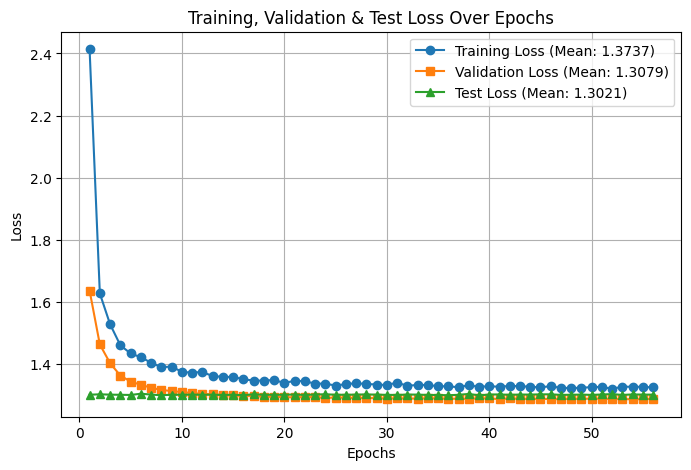

In [ ]:
# Plot the Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_loss, label=f'Training Loss (Mean: {mean_train_loss:.4f})', marker='o')
plt.plot(range(1, num_epochs + 1), val_loss, label=f'Validation Loss (Mean: {mean_val_loss:.4f})', marker='s')
plt.plot(range(1, num_epochs + 1), test_loss, label=f'Test Loss (Mean: {mean_test_loss:.4f})', marker='^')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation & Test Loss Over Epochs')
plt.legend()  # Legend will now include mean values in labels
plt.grid()
plt.show()